## 1. Introduction


## 2. Data Set
### 2.1	Hotel Reservation Data set


## 3. Data Recognition
As the first step, we need to import the main libraries to start analysis.


In [19]:
#| label: import-libraries
# importing main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings
from sklearn.feature_selection import VarianceThreshold
warnings.filterwarnings("ignore")

## 3.1 Loading Data
To use data, we need to import them and read the data. In this case, our data is CSV files, and it is in the folder whose name is data.

In [20]:
#| label: data-import
df = pd.read_csv('data\HotelReservations.csv')
df.head() 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [21]:
#| label: show how many rows and coloumn in data set
df.shape

(36275, 19)

With this function, we check all culmns and their type. 

In [22]:
#| label: Get informaion
# getting data on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## 4. Data Pre-processing
This process is beneficial for several reasons. Reducing dimensionality, improving computational efficiency and enhancing model performance.
In the pre-processing step, dimension reduction, outlier detection and missing value handling were conducted.

### 4.1. Dropping unnecessary columns and rows:
Dropping unnecessary columns and rows is a data preprocessing step that involves removing specific columns or rows from a dataset that are deemed unnecessary for the analysis or modeling task at hand. 
 We selected the best columns using the feature selection algorithm and we will obtain the accuracy of the model before and after that.


#### 4.2. Checking missing values
In most cases, we do not get complete datasets. They either have some missing values in the rows and columns. However, fortunately, we check whether the dataset has any missing values or not, and as you can see in the output of the block below, there is no missing value in this dataset


In [23]:
# Drop rows with null values
df = df.dropna()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

(36275, 19)

In [24]:
# Checking for missing values in the entire dataset
missing_values = df.isnull().sum()
# Printing the result
print(missing_values)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


#### 	4.3 Checking for garbage values
Garbage value is generally a term meaning that the value in a variable which means nothing.
By checking the statistical information of the data, some variables have negative values, and some have 0 values which are not compatible with the definition (corresponding to the dataset).
The detail of these values is given in the following tables:
 *** Negative Values and Ziro for deleting ***
 Using this code, we check the data for minus and zero values if they are not compatible by the meaning they have.

In [25]:
# get name the columns
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [26]:
# Checking the negative values of no_of_adults
df['no_of_adults'].value_counts()
#df['no_of_children'].value_counts()
#df['no_of_weekend_nights'].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

As shown above, there are no undefined values in each variables. Therefore, we omit no cases.



### 4.4 Checking the distribution of each variable 
Checking the distribution of each variable involves examining the spread and pattern of values within individual columns or features in the dataset. Understanding the distribution helps you gain insights into the central tendencies, variability, and shape of the data. This is crucial for making informed decisions during data analysis and modeling. Common statistical measures used to describe the distribution include mean, median, and standard deviation.
.


In [27]:
# check the distribution for each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


Using this code, the most important statistical information of each numeric predictiors are calculated.

In [28]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.shape

(36275, 14)

In [29]:
# finding zero variance variables
selector_vr= VarianceThreshold(threshold=0)
#selector_vr.fit_transform(df_numeric)
#selector_vr.get_support(indices=True)

If there are variables with standard deviation near the zero , we can delete it . 


In [30]:
df.head()
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

Now, we check the categorical variables and their categories to show the frequency of each values.

Histograms are useful for analyzing the frequency distribution of different values for each variable. In each histogram, the horizontal axis represents the variable values, and the vertical axis indicates the frequency or the number of times each value appears in the data. The height of each column reflects the frequency or the number of samples with a specific value in that interval.


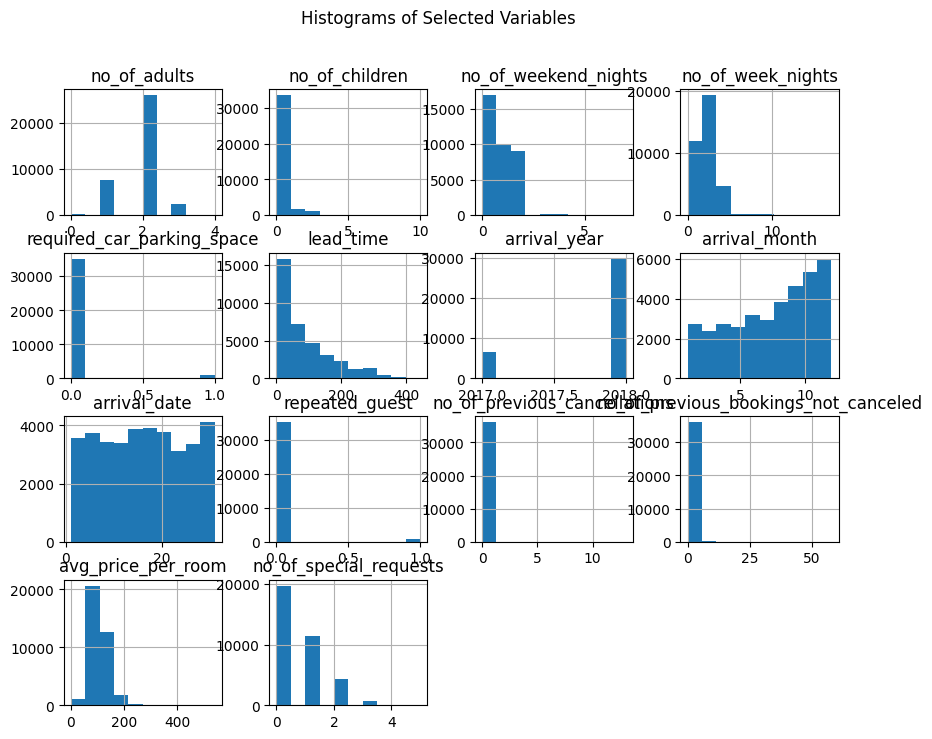

In [31]:
# Specify the columns you want to include in the analysis
selected_columns = ['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']

# Create a DataFrame containing only the selected columns
selected_df = df[selected_columns]

# Plot histograms for each variable
selected_df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Selected Variables')
plt.show()

In [32]:
# Displaying some statistics about categorical data
df.describe(include='object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


### 4.5 Data Transformation

#### 4.5.1 Transforming the categorical variables
In this step, we numerized object variables . As it mentioned earlier, booking_status and target has two object:Not_Canceled
, Canceled
. For efficient use in the models, we convert Canceled
 to 1 and Not_Canceled to 0.
If we have a column that is object or if we have Boolean, we can convert them to integer. In this stage I use the new data frame for own data with own selected column for better decision in the following steps.

In [33]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [34]:
#using Map Function
df2 = df.copy()

# Ordinal Encoding for booking_status: 1 for 'Canceled', 0 for 'Not_Canceled'
ordinal_map = {'Canceled': 1, 'Not_Canceled': 0}
df2['booking_status'] = df2['booking_status'].map(ordinal_map)
df2['booking_status'] = df2['booking_status'].astype(int)

We check again the structure of the dataframe.

In [35]:
#df2.info()
#df2.head()
#df2.shape
unique_values = df2['type_of_meal_plan'].unique()
print(unique_values)

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


In [36]:
# Get unique values in the column
unique_values = df2['booking_status'].unique()
print(unique_values)

[0 1]


#### 4.5.2 Normalization, standardization, scaling
